# Extracting a DFallpa [for Lucas. Xuan can ignore]

In [2]:
%load_ext autoreload
%autoreload 2


Searching using this string:
/home/lucas/mnt/Freiwald/ltian/recordings/*Diego*/*230615*/**
Found this many paths:
2
---
/home/lucas/mnt/Freiwald/ltian/recordings/Diego/230615/Diego-230615-104852
---
/home/lucas/mnt/Freiwald/ltian/recordings/Diego/230615/Diego-230615-105514
session:  0
Searching using this string:
/home/lucas/mnt/Freiwald/ltian/recordings/*Diego*/*230615*/**
Found this many paths:
2
---
/home/lucas/mnt/Freiwald/ltian/recordings/Diego/230615/Diego-230615-104852
---
/home/lucas/mnt/Freiwald/ltian/recordings/Diego/230615/Diego-230615-105514
Beh Sessions hand netered (mapping: rec sess --> beh sess):  [2, 3]
Beh Sessions that exist on this date:  {230615: [(2, 'priminvar5'), (3, 'priminvar5')]}
------------------------------
Loading this neural session: 0
Loading these beh expts: ['priminvar5']
Loading these beh sessions: [2]
Using this beh_trial_map_list: [(1, 0)]
Searching using this string:
/home/lucas/mnt/Freiwald/ltian/recordings/*Diego*/*230615*/**
Found this many pat

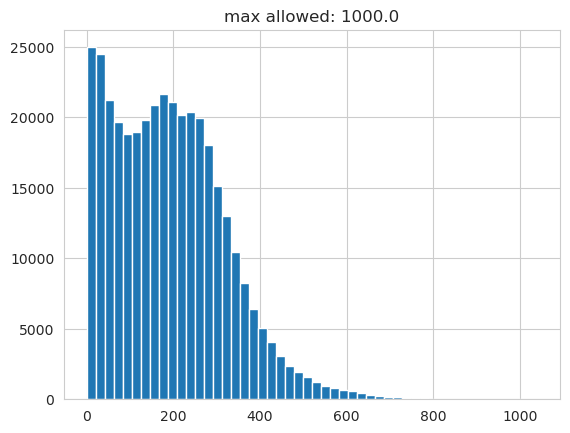

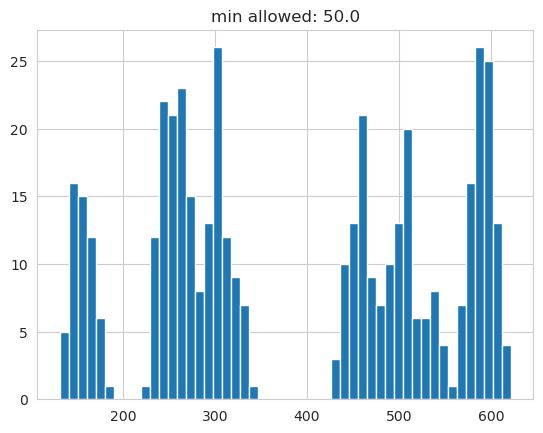

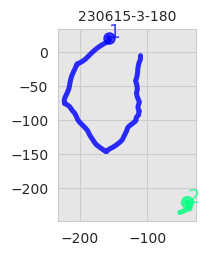

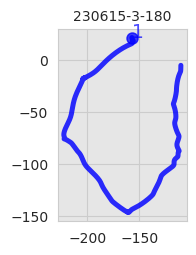

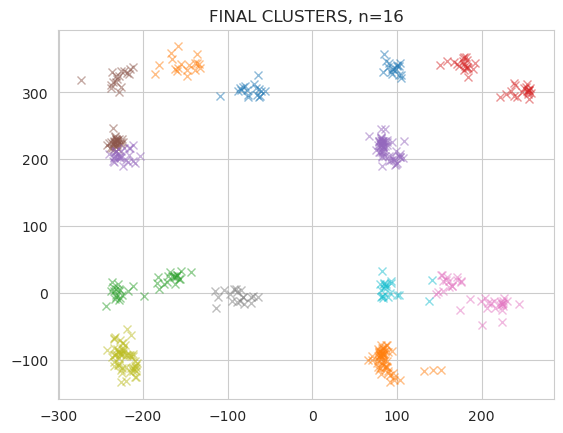

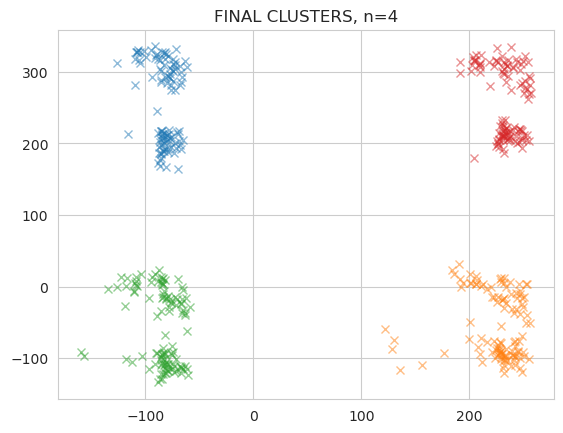

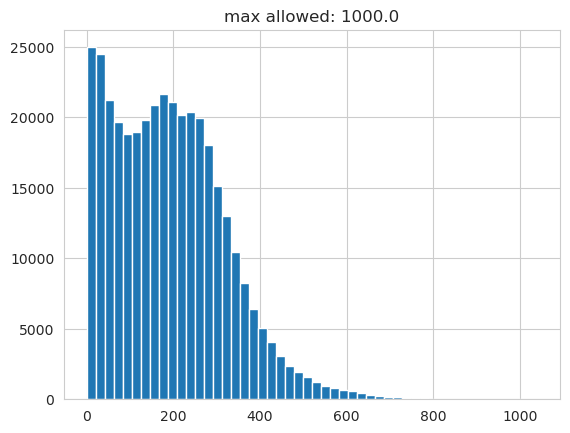

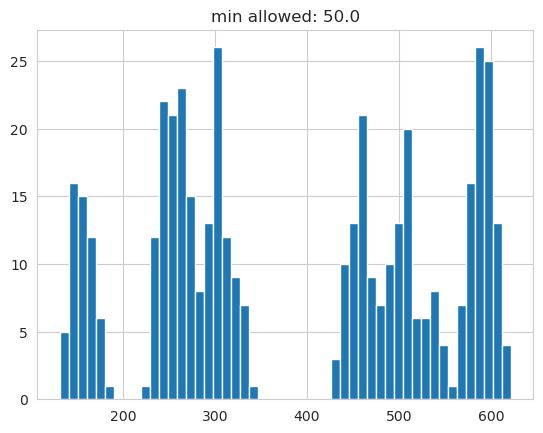

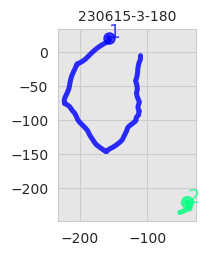

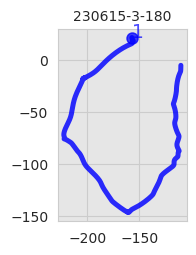

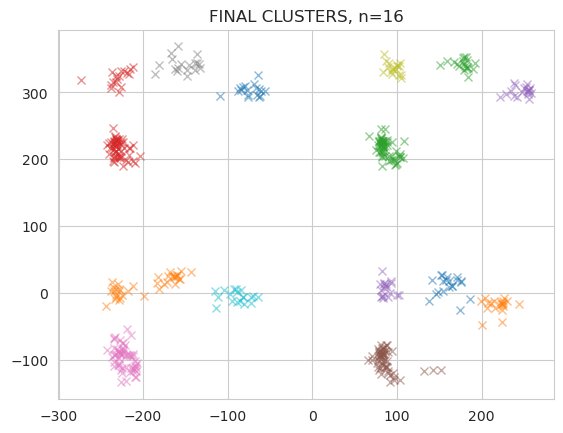

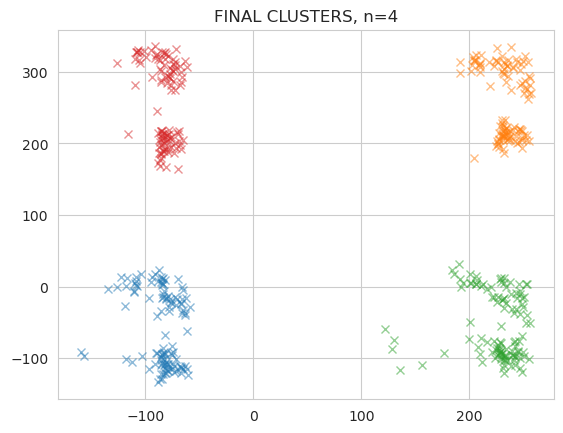

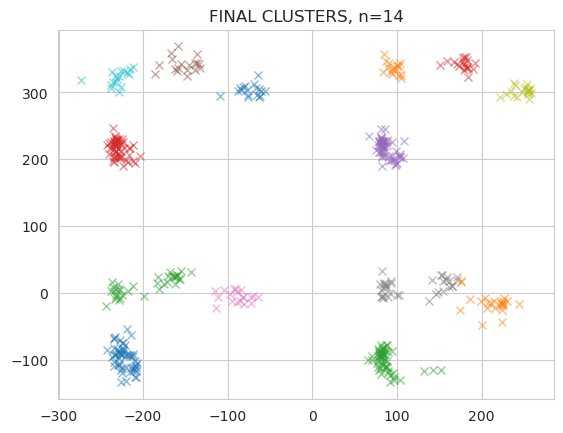

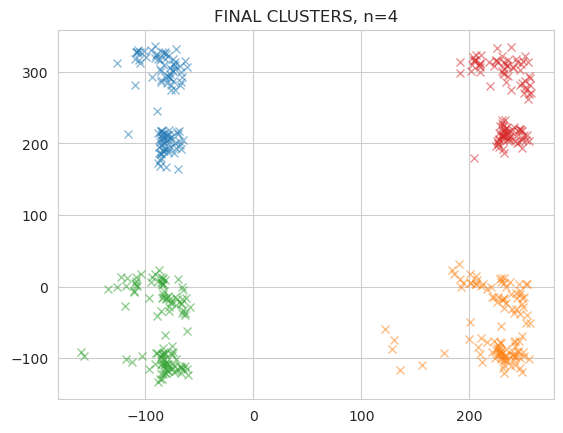

In [3]:
from neuralmonkey.classes.population_mult import dfallpa_extraction_load_wrapper
animal = "Diego"
date = 230615
question = "SP_shape_loc"
list_time_windows = [(-0.8, 0.8)]
# events_keep = ["03_samp", "06_on_strokeidx_0"]
events_keep = ["03_samp"]
combine_into_larger_areas = False
which_level = "trial"
exclude_bad_areas = True
SPIKES_VERSION = "kilosort"
HACK_RENAME_SHAPES = False
# fr_normalization_method = "across_time_bins"
fr_normalization_method = None
DFallpa = dfallpa_extraction_load_wrapper(animal, date, question, list_time_windows,
                                          which_level=which_level, events_keep=events_keep,
                                          combine_into_larger_areas = combine_into_larger_areas,
                                          exclude_bad_areas = exclude_bad_areas,
                                          SPIKES_VERSION = SPIKES_VERSION,
                                          HACK_RENAME_SHAPES = HACK_RENAME_SHAPES,
                                          fr_normalization_method=fr_normalization_method)

# Saving functions

### Save DFallpa as is

In [ ]:
# Save it
import pandas as pd
# path = "/gorilla4/Dropbox/SCIENCE/FREIWALD_LAB/DATA/DFallpa.pkl"
# path = "/home/lucas/Dropbox/SCIENCE/FREIWALD_LAB/DATA/Dolnik/DFallpa.pkl"
# path = "/home/lucas/Dropbox/SCIENCE/FREIWALD_LAB/DATA/Dolnik/DFallpa_2.pkl" # (tdt) (no norm)
# path = "/home/lucas/Dropbox/SCIENCE/FREIWALD_LAB/DATA/Dolnik/DFallpa_3.pkl" # (no norm)
# path = "/home/lucas/Dropbox/SCIENCE/FREIWALD_LAB/DATA/Dolnik/DFallpa_4.pkl" # (tdt)
path = "/home/lucas/Dropbox/SCIENCE/FREIWALD_LAB/DATA/Dolnik/DFallpa_KS.pkl" # (kilosort)
pd.to_pickle(DFallpa, path)
print("Saved to:", path)

### Save raw data

##### To save DFallPA

In [ ]:
from neuralmonkey.classes.population_mult import data_extract_raw_and_save
savepath = "/home/lucas/Dropbox/SCIENCE/FREIWALD_LAB/DATA/Dolnik/DFallpa_raw.pkl"
data_extract_raw_and_save(DFallpa, savepath)
# pd.to_pickle(DFallpa, savepath)

# OTHER STUFF

In [ ]:
# Load a question
from neuralmonkey.analyses.rsa import rsagood_questions_dict
DictParamsEachQuestion = rsagood_questions_dict(animal, date)
q_params = DictParamsEachQuestion[question]
print(q_params)

In [ ]:
# Normalize, etc
# Clean up DFallpa
from neuralmonkey.analyses.rsa import preprocess_rsa_prepare_popanal_wrapper, popanal_preprocess_scalar_normalization

subtract_mean_each_level_of_var = None
plot_example_chan = None

list_pa =[]
list_panorm = []
for pa in DFallpa["pa"].tolist():
    print(pa.X.shape)
    pa, res_check_tasksets, res_check_effectvars = preprocess_rsa_prepare_popanal_wrapper(pa, **q_params)
    print(pa.X.shape)

    panorm, _, _, _, _, _ = popanal_preprocess_scalar_normalization(pa, q_params["effect_vars"],
                                                                                  subtract_mean_each_level_of_var)
    
    list_pa.append(pa)
    list_panorm.append(panorm)
    
DFallpa["pa"] = list_pa
DFallpa["pa_norm"] = list_panorm


# Load a dataset

To load and plot a dataset of neural activity across population, in a PopAnal class object.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:

# this is the path to the dataset
# path = '/gorilla1/analyses/recordings/main/RSA/Diego-230615/agg_True-subtr_None-dist_euclidian_unbiased/SP_shape_loc/DFallpa.pkl'
# path = "/gorilla4/Dropbox/SCIENCE/FREIWALD_LAB/DATA/for_xuan/DFallpa.pkl"
# path = "/home/lucas/Dropbox/SCIENCE/FREIWALD_LAB/DATA/DFallpa.pkl"
path = "/home/lucas/Dropbox/SCIENCE/FREIWALD_LAB/DATA/Dolnik/DFallpa_raw.pkl"


In [ ]:
DFallpa = pd.read_pickle(path)


# EXAMPLE CODE for preprocessing of data

In [ ]:
# Get a PA, just for example
pa = DFallpa["pa"].values[0]

In [ ]:
# 1. First slice to time winodw, then take mean over time, i.e. a single time average
twind = (0.1, 0.5)
pa_sliced = pa.slice_by_dim_values_wrapper("times", twind)
pa_mean = pa_sliced.agg_wrapper("times")

print("Compare and see that times are binned")
print("-- original:", pa.Times, "... data shape: ", pa.X.shape)
print("-- sliced:", pa_sliced.Times, "... data shape: ", pa_sliced.X.shape)
print("-- mean:", pa_mean.Times, "... data shape: ", pa_mean.X.shape)


In [ ]:
# 2. binning time windows
binsize = 0.1
binslide = 0.02
pa_binned = pa.agg_by_time_windows_binned(binsize, binslide)
    
print("Compare and see that times are binned")
print("-- original:", pa.Times, "... data shape: ", pa.X.shape)
print("-- sliced:", pa_binned.Times, "... data shape: ", pa_binned.X.shape)


# Code example for benchmarking: decoding shapes

This step takes in a representation of neural data and outputs a scalar score for how well you can decode "shape" from that data

Here, this example is using the raw data (dimensionality = number of channels). The goal is to use methods to reduce the dimensionality of this data, each time running through this decoding benchmark, to compare the different methods

##### First, pull out a specific PA. (just an example)

NOTE: tjhis is just for demonstration. Eventually you will want to loop thru all PA, scoring them all

In [ ]:
DFallpa

In [ ]:
def extract_single_pa(DFallpa, bregion, twind):
    which_level = "trial"
    event = "03_samp"

    a = DFallpa["which_level"]==which_level
    b = DFallpa["event"]==event
    c = DFallpa["bregion"]==bregion
    d = DFallpa["twind"]==twind
    
    tmp = DFallpa[a & b & c & d]
    assert len(tmp)==1
    pa = tmp["pa"].values[0]
    
    return pa
    

In [ ]:
### PARAMS
bregion = "PMv"
twind = (-0.4, 0.6)

### RUN
pa = extract_single_pa(DFallpa, bregion, twind)

nchans = pa.X.shape[0]
ntrials = pa.X.shape[1]
ntimes = pa.X.shape[2]

print("Shape of this dataset (chans, trials, times):", nchans, ntrials, ntimes)
print("Data is stored in pa.X: ", pa.X.shape)

##### Finally, extract the data that goes into the decoder

Extract activity wthin a specific time bin. Eventualy, you would want to test all time bins.

In [ ]:
tbin = 0
X = pa.X[:, :, tbin].T # (ntrials, nchans)
print(X.shape)

The variable you are trying to decode/predict is the shape on each trial.

In [ ]:
var = "seqc_0_shape"
shapes = pa.Xlabels["trials"][var].tolist()

print(shapes[:5])
print(len(shapes))

##### Train and test decoder

This is using a helper function I wrote (_model_fit) but you should go into the code to know how it works

In [ ]:
from neuralmonkey.population.classify import _model_fit

model_params_optimal = {"C":0.01} # optimized regularization params
pipe, score = _model_fit(X, shapes, model_params=model_params_optimal, do_center=True, do_std=False)

print("Model score (prediction accuracy on held-out test data):", score)

In [ ]:
print("Expected score if guessing = ", 1/len(set(shapes)))

In [ ]:
PAnorm.plotNeurHeat(0)

In [ ]:
pa.plotNeurHeat(0)

# LT added 2/15/24

## 1) Make sure to normalize PA before running any modeling on it:

In [ ]:
list_panorm = []
for pa in DFallpa["pa"].tolist():
    from neuralmonkey.analyses.state_space_good import popanal_preprocess_scalar_normalization
    PAnorm, PAscal, PAscalagg, fig, axes, groupdict = popanal_preprocess_scalar_normalization(pa, None, DO_AGG_TRIALS=False)
    list_panorm.append(PAnorm)
DFallpa["pa"] = list_panorm
del DFallpa["pa_norm"]

## 2) Code to plot neural trajectories in lower dimensions, colored and split by variables of interest

In [ ]:
from neuralmonkey.analyses.state_space_good import trajgood_construct_df_from_raw, trajgood_plot_colorby_splotby

# Plot an example brain region's data.
bregion = "PMv"
twind = (-0.4, 0.6)
pa = extract_single_pa(DFallpa, bregion, twind)

# INPUT PARAMS
var_color_by = "seqc_0_shape"
var_subplots = "seqc_0_loc"

# Runs

# 1) Construct dataframe
# df = pa.dataextract_split_by_label_grp_for_statespace(grpvars)
grpvars = [var_color_by, var_subplots]
X = pa.X # (chans, trials, times)
labels = pa.Xlabels["trials"].loc[:, grpvars] 
labelvars = grpvars
df = trajgood_construct_df_from_raw(X, pa.Times, labels, labelvars)

# 2) Plot
dims = (2,3) # pairs of dimensions to plot
times_to_mark = [0.] # you can mark specific times on the plot. here marks the 0. sec mark.
times_to_mark_markers = ["d"] # mark with a diamond ("d")
time_bin_size = 0.05 # to make plot easier to visaulize, you can bin in time.
trajgood_plot_colorby_splotby(df, var_color_by, var_subplots, dims, "traj", mean_over_trials=True,
                              times_to_mark = times_to_mark, times_to_mark_markers = times_to_mark_markers,
                              time_bin_size=time_bin_size)

In [ ]:
plt.show()

In [ ]:
# Same, but coloring by location

var_color_by = "seqc_0_loc"
var_subplots = "seqc_0_shape"

# 1) Construct dataframe
# df = pa.dataextract_split_by_label_grp_for_statespace(grpvars)
grpvars = [var_color_by, var_subplots]
X = pa.X # (chans, trials, times)
labels = pa.Xlabels["trials"].loc[:, grpvars] 
labelvars = grpvars
df = trajgood_construct_df_from_raw(X, pa.Times, labels, labelvars)

# 2) Plot
dims = (0,1) # pairs of dimensions to plot
times_to_mark = [0.] # you can mark specific times on the plot. here marks the 0. sec mark.
times_to_mark_markers = ["d"] # mark with a diamond ("d")
time_bin_size = 0.1 # to make plot easier to visaulize, you can bin in time.
trajgood_plot_colorby_splotby(df, var_color_by, var_subplots, dims, "traj", mean_over_trials=True,
                              times_to_mark = times_to_mark, times_to_mark_markers = times_to_mark_markers,
                              time_bin_size=time_bin_size)

##### 3D interactive plot

In [ ]:
import numpy as np
np.stack(df["z"].tolist()).shape

In [ ]:
df["z"].values[-1].shape

In [ ]:
Xall = df["z"].values[0] # (nchan, ntrials, ntimes)
X = Xall[:, 0, :]

In [ ]:
pcol = "k"

In [ ]:
import matplotlib 
# matplotlib.use('Qt5Agg') 
matplotlib.use("nbagg")
import matplotlib.pyplot as plt

In [ ]:
# %matplotlib notebook
matplotlib.use('Qt5Agg')

fig = plt.figure(figsize=(3,3))
# ax = fig.gca(projection='3d')
ax = plt.axes(projection="3d")


ax.plot(X[0,:], X[1,:], X[2,:], "-o", color=pcol, alpha=0.4)
ax.plot(X[0,-1], X[1,-1], X[2,-1], "-s", mfc="w", color=pcol, alpha=0.4)
ax.plot(X[0, 0], X[1,0], X[2,0], "-c", mfc="w", color=pcol, alpha=0.4)

ax.view_init(50, -60)

ax.set_xlabel(f"dim 0")
ax.set_ylabel(f"dim 1")
ax.set_zlabel(f"dim 2")

plt.ylabel('some numbers')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
matplotlib.use('Qt5Agg')
plt.style.use('default')
plt.plot([1,2,3,4])
plt.ylabel('some numbers')
plt.show()

In [ ]:
import matplotlib
matplotlib.matplotlib_fname()

In [ ]:
matplotlib.use('Qt5Agg')
matplotlib.get_backend()

##### Plot single trials (this plots one example trial per condition)

In [ ]:
# INPUT PARAMS
var_color_by = "seqc_0_shape"
var_subplots = "seqc_0_loc"

# Runs

# 1) Construct dataframe
# df = pa.dataextract_split_by_label_grp_for_statespace(grpvars)
grpvars = [var_color_by, var_subplots]
X = pa.X # (chans, trials, times)
labels = pa.Xlabels["trials"].loc[:, grpvars] 
labelvars = grpvars
df = trajgood_construct_df_from_raw(X, pa.Times, labels, labelvars)

# 2) Plot
dims = (0,1) # pairs of dimensions to plot
times_to_mark = None # you can mark specific times on the plot. here marks the 0. sec mark.
times_to_mark_markers = None # mark with a diamond ("d")
time_bin_size = 0.05 # to make plot easier to visaulize, you can bin in time.

# plot a few times, each picking a random trial
niter = 3
mean_over_trials = False
ntrials = 1
for _ in range(niter):
    trajgood_plot_colorby_splotby(df, var_color_by, var_subplots, dims, "traj", mean_over_trials=mean_over_trials,
                                  times_to_mark = times_to_mark, times_to_mark_markers = times_to_mark_markers,
                                  time_bin_size=time_bin_size, ntrials = ntrials)

## 3) Score and plot decoding accuracy

1. Try different methods for dim reduction of X. In all cases, if X is shape (nchans, ntrials, ntimes), dim reduction should return Xreduced of shape (ndim, ntrials, ntimes) where ndim < nchans
2. For the benchmark decoder, you want to score looping through each bregion, twind, and tbin. i.e, see below

In [ ]:
list_dim_reduction_methods = ["pca", "CEBRA"] # FILL THIS IN

In [ ]:
HACK = True # quickly run to see what it's like, without any dim reduction methods

if HACK:
    list_dim_reduction_methods = ["IGNORE"]

In [ ]:
def compute_decode_score(x, labels, max_nsplits=5):
    """
    Score decoding accuracy
    """
    from neuralmonkey.analyses.decode_good import decode_categorical_wrapper
    from neuralmonkey.population.classify import _model_fit
    import numpy as np
    
    assert x.shape[0]==len(labels)
    assert len(x.shape)==2
    
    res = decode_categorical_wrapper(Xreduced_this_time_bin, labels, 3, max_nsplits=max_nsplits)
    # get mean score across splits
    return np.mean([r["score_xval"] for r in res])
    

In [ ]:
from neuralmonkey.utils.frmat import bin_frmat_in_time


In [ ]:
list_br = DFallpa["bregion"].unique().tolist()
list_tw = DFallpa["twind"].unique().tolist()

res = []

list_vars_decode = ["seqc_0_shape", "seqc_0_loc"]

for br in list_br:
    for tw in list_tw:
        # 1. Extract the specific pa for this (br, tw)
        pa = extract_single_pa(DFallpa, br, tw)
        
        # 2. Extract X from pa
        X = pa.X # (nchans, ntrials, ntimes)
        times = pa.Times
        
        # Optionally, bin X in time, to have fewer time bins to decode
        X, times = bin_frmat_in_time(X, times, time_bin_size=0.1, slide=0.02)

        list_tbin = range(X.shape[2])
        for method in list_dim_reduction_methods:
            print(br, tw, method)
            # 2. Apply this method to pa
            if HACK:
                Xreduced = X
            else:
                Xreduced = dim_reduce(X, method) # FILL THIS IN
            
            for tbin in list_tbin:
                # 3a. Extract data for this time bin
                Xreduced_this_time_bin = Xreduced[:, :, tbin].T # (ntrials, nchans)                    
    
                # 3. Run decoder
                for var_decode in list_vars_decode:
                    # labels = pa.Xlabels["trials"][var_decode].tolist()
                    labels = pd.factorize(pa.Xlabels["trials"][var_decode])[0]
                    score = compute_decode_score(Xreduced_this_time_bin, labels) # FILL THIS IN
                    
                    # 3. Collect data
                    res.append({
                        "method":method,
                        "bregion":br,
                        "twind":tw,
                        "tbin":tbin,
                        "time":times[tbin],
                        "var_decode":var_decode,
                        "score":score
                    })

dfres = pd.DataFrame(res)
     

In [ ]:
dfres[:5]

In [ ]:
%matplotlib inline
##### Plot the results, comparing score across methods!!
import seaborn as sns
fig = sns.relplot(data=dfres, x="time", y="score", hue="bregion", col="var_decode", row="method", kind="line")



# 4) Cross-condition decoding

In [ ]:
from neuralmonkey.analyses.decode_good import decode_train, decode_categorical_cross_condition_wrapper



In [ ]:
# PARAMS
subtract_mean_vars_conj = True # WHether to normalize by sutbracting mean within each level of othervar...
list_var_decode = ["seqc_0_shape", "seqc_0_loc"][::-1]
list_vars_conj = [
    ["seqc_0_loc"],
    ["seqc_0_shape"]][::-1]

# RUns
list_br = DFallpa["bregion"].unique().tolist()
list_tw = DFallpa["twind"].unique().tolist()
    
res = []
for br in list_br:
    for tw in list_tw:
        for var_decode, vars_conj_condition in zip(list_var_decode, list_vars_conj):
            
            # 1. Extract the specific pa for this (br, tw)
            pa = extract_single_pa(DFallpa, br, tw).copy()
            
            if subtract_mean_vars_conj:
                pa = pa.norm_by_label_subtract_mean("trials", vars_conj_condition)
    
            # 2. Extract X from pa
            X = pa.X # (nchans, ntrials, ntimes)
            times = pa.Times
            
            # Optionally, bin X in time, to have fewer time bins to decode
            X, times = bin_frmat_in_time(X, times, time_bin_size=0.1, slide=0.02)
    
            list_tbin = range(X.shape[2])
            for method in list_dim_reduction_methods:
                print(br, tw, method)
                # 2. Apply this method to pa
                if HACK:
                    Xreduced = X
                else:
                    Xreduced = dim_reduce(X, method) # FILL THIS IN
                
                for tbin in list_tbin:
                    
                    Xscal = Xreduced[:, :, tbin].T # (ntrials, nchans)
                    dflab = pa.Xlabels["trials"]
                    
                    
                    dfresthis, dfres_agg = decode_categorical_cross_condition_wrapper(Xscal, dflab, var_decode, vars_conj_condition, do_std=False)
                    assert len(dfres_agg)==1
                    
                    # 3. Collect data
                    res.append({
                        "method":method,
                        "bregion":br,
                        "twind":tw,
                        "tbin":tbin,
                        "time":times[tbin],
                        "var_decode":var_decode,
                        "vars_conj_condition":tuple(vars_conj_condition),
                        "score":dfres_agg["score"].values[0],
                        "score_adjusted":dfres_agg["score_adjusted"].values[0],
                    })

DFRES = pd.DataFrame(res)
     
     

In [ ]:
DFRES[:5]

In [ ]:
##### Plot the results, comparing score across methods!!
%matplotlib inline
import seaborn as sns
fig = sns.relplot(data=DFRES, x="time", y="score", hue="bregion", col="var_decode", row="method", kind="line")

